In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('missing_value_imputed.csv')
df.shape

(3562, 18)

In [3]:
train_df = df.drop(columns=['society','price_per_sqft'])

<Axes: ylabel='luxury_score'>

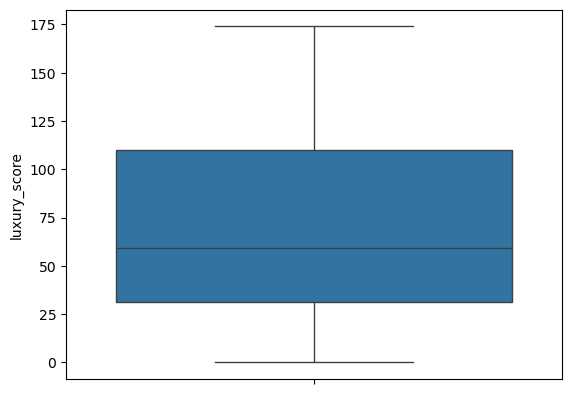

In [4]:

sns.boxplot(df['luxury_score'])

In [5]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [6]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

<Axes: ylabel='floorNum'>

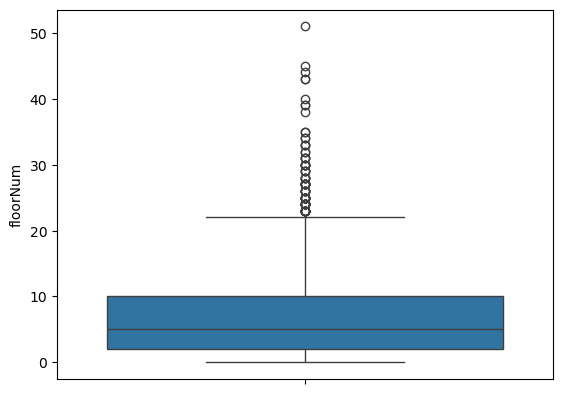

In [7]:
sns.boxplot(df['floorNum'])

In [8]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low"
    elif 3 <= floor <= 10:
        return "Mid"
    elif 11 <= floor <= 51:
        return "High"
    else:
        return None

In [9]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [10]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,others,store room,pooja room,servant room,study room,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 56,0.50,1,1,2,3.0,Old Property,667.0,0,0,0,0,0,1,0,Low,Mid
1,house,sector 43,11.50,7,8,3+,3.0,Old Property,9000.0,0,1,1,1,0,0,31,Low,Mid
2,flat,sector 85,1.20,2,2,2,4.0,Relatively New,1190.0,0,1,0,1,0,1,81,Medium,Mid
3,flat,sector 28,2.35,3,4,3,8.0,Old Property,1700.0,0,0,0,1,0,0,109,Medium,Mid
4,flat,sector 82a,2.20,3,3,3+,16.0,Relatively New,1893.0,0,0,0,1,0,2,174,High,High


In [11]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector

In [13]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,others,store room,pooja room,servant room,study room,furnishing_type,luxury_category,floor_category
0,0.0,61.0,1,1,2.0,2.0,667.0,0,0,0,0,0,1,1.0,2.0
1,1.0,48.0,7,8,4.0,2.0,9000.0,0,1,1,1,0,0,1.0,2.0
2,0.0,95.0,2,2,2.0,3.0,1190.0,0,1,0,1,0,1,2.0,2.0
3,0.0,33.0,3,4,3.0,2.0,1700.0,0,0,0,1,0,0,2.0,2.0
4,0.0,92.0,3,3,4.0,3.0,1893.0,0,0,0,1,0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,1.0,7.0,3,3,1.0,0.0,1125.0,0,0,0,0,0,0,1.0,1.0
3558,0.0,78.0,3,5,3.0,3.0,1527.0,0,0,0,1,0,0,2.0,2.0
3559,0.0,42.0,3,3,3.0,3.0,1686.0,1,0,0,0,0,1,1.0,0.0
3560,0.0,92.0,1,1,0.0,3.0,650.0,0,0,0,0,0,1,1.0,2.0


In [14]:
y_label

0        0.50
1       11.50
2        1.20
3        2.35
4        2.20
        ...  
3557     1.30
3558     1.64
3559     1.50
3560     0.62
3561     1.99
Name: price, Length: 3562, dtype: float64

<Axes: >

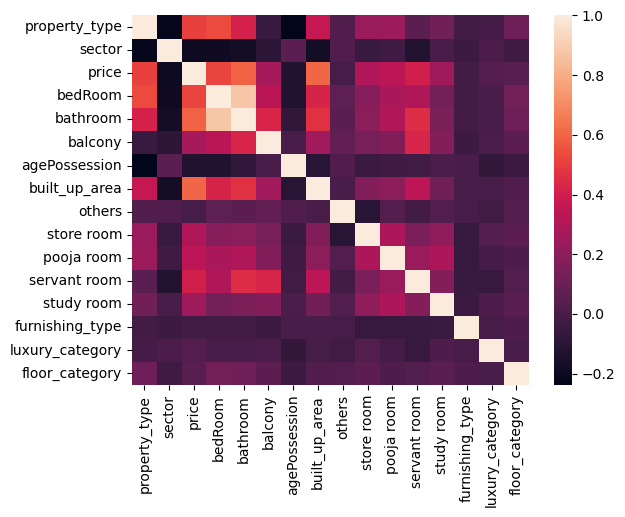

In [15]:
sns.heatmap(data_label_encoded.corr())

In [16]:
feat_imp1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
feat_imp1

,feature,corr_coeff
0,sector,-0.198574
1,price,1.000000
2,bedRoom,0.520446
3,bathroom,0.589450
4,balcony,0.274250
5,agePossession,-0.131347
6,built_up_area,0.601815
7,others,-0.006339
8,store room,0.300577
9,pooja room,0.334952


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
feat_imp2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

feat_imp2

,feature,rf_importance
6,built_up_area,0.558367
1,sector,0.101230
0,property_type,0.080828
3,bathroom,0.062084
2,bedRoom,0.051638
10,servant room,0.039552
11,study room,0.017151
9,pooja room,0.016711
4,balcony,0.016103
5,agePossession,0.015691


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
feat_imp3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

feat_imp3

,feature,gb_importance
6,built_up_area,0.590325
1,sector,0.097338
0,property_type,0.091647
3,bathroom,0.082387
10,servant room,0.066719
2,bedRoom,0.035741
9,pooja room,0.010682
11,study room,0.009884
13,luxury_category,0.006774
4,balcony,0.002251


In [19]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
feat_imp4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

feat_imp4

,feature,permutation_importance
6,built_up_area,0.646993
0,property_type,0.194012
1,sector,0.129828
3,bathroom,0.086182
10,servant room,0.051146
9,pooja room,0.022440
2,bedRoom,0.016708
4,balcony,0.012376
11,study room,0.011567
5,agePossession,0.003515


In [21]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
feat_imp5 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

feat_imp5

,feature,rfe_score
6,built_up_area,0.559319
1,sector,0.102987
0,property_type,0.078830
3,bathroom,0.069412
2,bedRoom,0.047090
10,servant room,0.033734
9,pooja room,0.022852
4,balcony,0.017115
5,agePossession,0.014602
11,study room,0.014518


In [22]:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
feat_imp6 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

feat_imp6

,feature,lasso_coeff
3,bathroom,0.944362
6,built_up_area,0.907783
0,property_type,0.725801
10,servant room,0.333058
11,study room,0.245878
8,store room,0.238706
9,pooja room,0.181643
13,luxury_category,0.097284
4,balcony,0.043368
12,furnishing_type,0.016756


In [28]:
!pip install shap

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     --------------- ------------------------ 1.0/2.6 MB 5.4 MB/s eta 0:00:01
     ------------------------------- -------- 2.1/2.6 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 5.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.8 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:-

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [260 lines of output]
  C:\Users\anush\AppData\Local\Temp\pip-build-env-x8kagyzr\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
  !!
  
          ********************************************************************************
          Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
  
          By 2026-Feb-18, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    corresp(dist, value, root_dir)
  C:\Users\anush\AppData\Local\Temp\pip-build

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

feat_imp7 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

feat_imp7

In [23]:
final_feat_imp = feat_imp1.merge(feat_imp2,on='feature').merge(feat_imp3,on='feature').merge(feat_imp4,on='feature').merge(feat_imp5,on='feature').merge(feat_imp6,on='feature').set_index('feature')

In [24]:
final_feat_imp

,corr_coeff,rf_importance,gb_importance,permutation_importance,rfe_score,lasso_coeff
feature,,,,,,
sector,-0.198574,0.101230,0.097338,0.129828,0.102987,-0.063468
bedRoom,0.520446,0.051638,0.035741,0.016708,0.047090,-0.351550
bathroom,0.589450,0.062084,0.082387,0.086182,0.069412,0.944362
balcony,0.274250,0.016103,0.002251,0.012376,0.017115,0.043368
agePossession,-0.131347,0.015691,0.001448,0.003515,0.014602,-0.035119
built_up_area,0.601815,0.558367,0.590325,0.646993,0.559319,0.907783
others,-0.006339,0.004417,0.001135,0.001484,0.004160,-0.036967
store room,0.300577,0.006258,0.000381,0.000854,0.005943,0.238706
pooja room,0.334952,0.016711,0.010682,0.022440,0.022852,0.181643


In [25]:
final_feat_imp = final_feat_imp.divide(final_feat_imp.sum(axis=0), axis=1)

In [27]:
final_feat_imp[['rf_importance','gb_importance','permutation_importance','rfe_score','lasso_coeff']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.577578
bathroom           0.140668
sector             0.086996
servant room       0.067961
study room         0.031317
pooja room         0.030209
store room         0.022241
luxury_category    0.014747
balcony            0.013736
furnishing_type    0.006450
agePossession      0.004771
bedRoom            0.004246
floor_category    -0.000341
others            -0.000579
dtype: float64